In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import datetime
import random
import seaborn as sns

from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

400

,BUY_N,SELL_N,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,10,10,101,4.963730,2.399585,-0.417325,-0.724579,0.425743,0.533333,0.143584
1,10,20,69,4.156645,2.584264,-0.483839,-0.724579,0.420290,0.533333,0.131575
2,10,30,54,5.018359,2.717307,-0.513616,-0.724579,0.351852,0.600000,0.145293
3,10,40,46,4.288583,2.554249,-0.571196,-0.724579,0.347826,0.400000,0.134588
4,10,50,40,4.735575,2.583906,-0.571859,-0.724579,0.375000,0.533333,0.142044


,BUY_N,SELL_N,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,105.000000,105.000000,12.457500,5.565247,2.517920,-0.441862,-7.245794e-01,0.572480,0.363583,0.153857
std,57.735027,57.735027,10.935821,2.048552,0.190374,0.114208,5.077440e-15,0.121710,0.093626,0.028200
min,10.000000,10.000000,5.000000,1.682959,2.136527,-0.648733,-7.245794e-01,0.230769,0.200000,0.081776
25%,57.500000,57.500000,6.000000,3.977888,2.380701,-0.525214,-7.245794e-01,0.500000,0.285714,0.134266
50%,105.000000,105.000000,8.000000,5.446387,2.567181,-0.460175,-7.245794e-01,0.571429,0.333333,0.156233
75%,152.500000,152.500000,15.000000,7.150054,2.656503,-0.366158,-7.245794e-01,0.666667,0.466667,0.176554
max,200.000000,200.000000,101.000000,10.307833,2.832171,-0.182239,-7.245794e-01,0.875000,0.600000,0.206584


,BUY_N,SELL_N,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
123,70,40,15,8.485597,2.827624,-0.394058,-0.724579,0.533333,0.533333,0.187813
124,70,50,13,9.473521,2.827624,-0.366527,-0.724579,0.615385,0.533333,0.196850
143,80,40,13,9.923634,2.554837,-0.297004,-0.724579,0.615385,0.533333,0.201378
144,80,50,12,9.960737,2.554837,-0.297645,-0.724579,0.666667,0.533333,0.201691
163,90,40,11,10.226168,2.380701,-0.296302,-0.724579,0.727273,0.533333,0.204582
164,90,50,11,9.943769,2.380701,-0.318253,-0.724579,0.727273,0.533333,0.202222
166,90,70,10,7.828259,2.380701,-0.348021,-0.724579,0.500000,0.533333,0.182508
183,100,40,11,10.178304,2.474055,-0.298891,-0.724579,0.727273,0.533333,0.204872
184,100,50,11,9.924063,2.474055,-0.320824,-0.724579,0.727273,0.533333,0.202733
186,100,70,10,7.789527,2.474055,-0.350653,-0.724579,0.500000,0.533333,0.182714


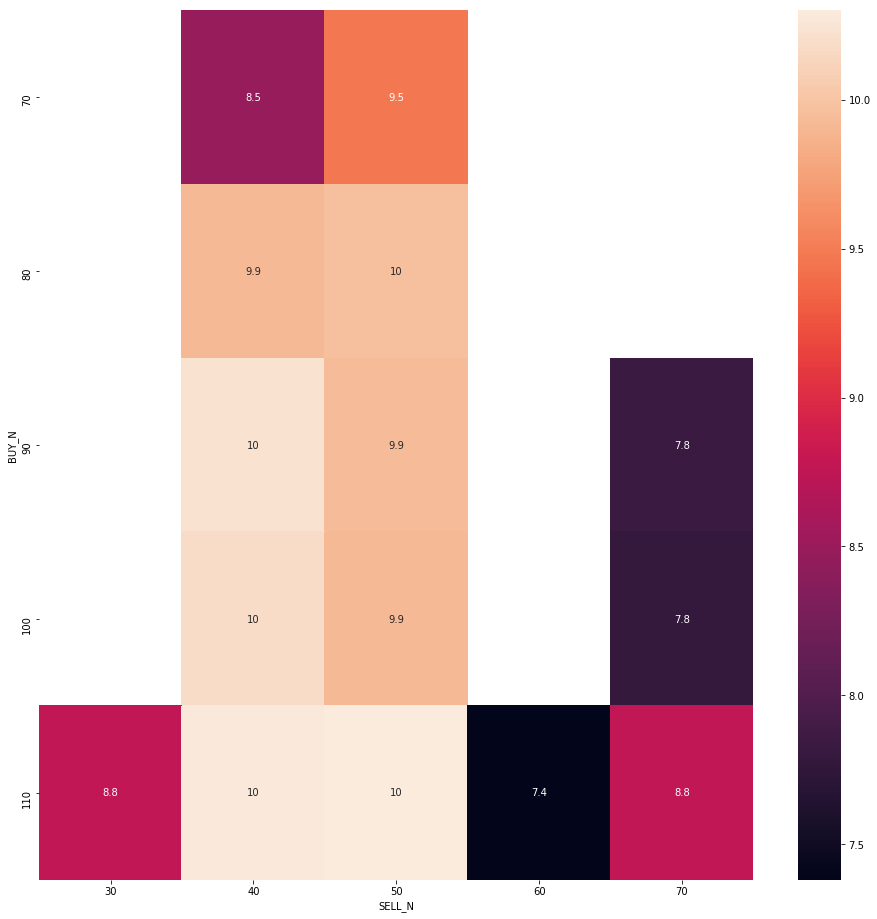

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/399300-2005-2019-TT-PARAMTEST-20190518221407.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['BUY_N', 'SELL_N', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN_ALGO'] > md]
# df
md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['WINRATE_YEARLY'] > md]
df

heat_df = df.pivot(index='BUY_N', columns='SELL_N', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

240

,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,1,2436,9.018116,2.872156,-0.539407,-0.724579,0.548995,0.466667,0.185183
1,1,0,2436,9.018116,2.872156,-0.539407,-0.724579,0.548995,0.466667,0.185183
2,1,3,1203,10.402292,2.872156,-0.534631,-0.724579,0.602187,0.600000,0.196545
3,1,2,1584,3.207846,2.872156,-0.666881,-0.724579,0.587444,0.400000,0.111758
4,1,4,925,26.338504,2.872156,-0.371854,-0.724579,0.631291,0.666667,0.276232


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000
mean,15.50000,3.500000,545.458333,28.780890,3.219344,-0.447930,-7.245794e-01,0.595237,0.636111,0.269023
std,8.67353,2.296076,307.506027,17.127959,0.204787,0.089499,4.042479e-15,0.022290,0.089586,0.062246
min,1.00000,0.000000,281.000000,1.141136,2.869227,-0.679619,-7.245794e-01,0.531915,0.400000,0.057771
25%,8.00000,1.750000,359.750000,15.781513,3.036867,-0.508464,-7.245794e-01,0.581325,0.600000,0.233123
50%,15.50000,3.500000,459.000000,24.509249,3.197939,-0.446133,-7.245794e-01,0.597812,0.666667,0.271762
75%,23.00000,5.250000,614.250000,40.576987,3.403040,-0.386558,-7.245794e-01,0.611383,0.683333,0.317972
max,30.00000,7.000000,2436.000000,75.763707,3.543274,-0.261407,-7.245794e-01,0.652381,0.866667,0.378724


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
82,11,2,564,54.854978,3.153014,-0.336997,-0.724579,0.574240,0.800000,0.346431
88,12,0,641,61.062126,3.186832,-0.310253,-0.724579,0.567610,0.733333,0.357085
89,12,1,641,61.062126,3.186832,-0.310253,-0.724579,0.567610,0.733333,0.357085
96,13,0,612,75.763707,3.141598,-0.303983,-0.724579,0.591433,0.733333,0.378724
97,13,1,612,75.763707,3.141598,-0.303983,-0.724579,0.591433,0.733333,0.378724
98,13,2,534,67.158625,3.141598,-0.338785,-0.724579,0.603025,0.666667,0.366649
131,17,3,427,67.327980,3.292665,-0.319512,-0.724579,0.604215,0.666667,0.367402
132,17,5,355,57.076590,3.292665,-0.392148,-0.724579,0.594366,0.666667,0.351035
135,17,6,347,61.220988,3.292665,-0.380068,-0.724579,0.613833,0.733333,0.357951
146,19,2,416,62.092741,3.319233,-0.316978,-0.724579,0.598063,0.666667,0.359597


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
47,6,6,583,14.577148,3.003646,-0.587290,-0.724579,0.590674,0.800000,0.224751
82,11,2,564,54.854978,3.153014,-0.336997,-0.724579,0.574240,0.800000,0.346431
83,11,3,506,52.964469,3.153014,-0.365717,-0.724579,0.573705,0.800000,0.343007
85,11,4,458,42.876687,3.153014,-0.332376,-0.724579,0.590810,0.800000,0.322613
90,12,3,515,44.818403,3.186832,-0.321339,-0.724579,0.587891,0.866667,0.326965
99,13,3,500,46.727303,3.141598,-0.336682,-0.724579,0.602823,0.800000,0.331089
114,15,2,475,51.240740,3.131738,-0.342671,-0.724579,0.602972,0.800000,0.340248
115,15,3,444,46.945591,3.131738,-0.369686,-0.724579,0.595455,0.800000,0.331762
116,15,5,365,36.909488,3.131738,-0.422531,-0.724579,0.612637,0.800000,0.308807
117,15,4,396,42.391939,3.131738,-0.356181,-0.724579,0.611675,0.800000,0.321960


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
82,11,2,564,54.854978,3.153014,-0.336997,-0.724579,0.57424,0.8,0.346431
163,21,3,387,59.746497,3.390359,-0.283932,-0.724579,0.61399,0.8,0.356027


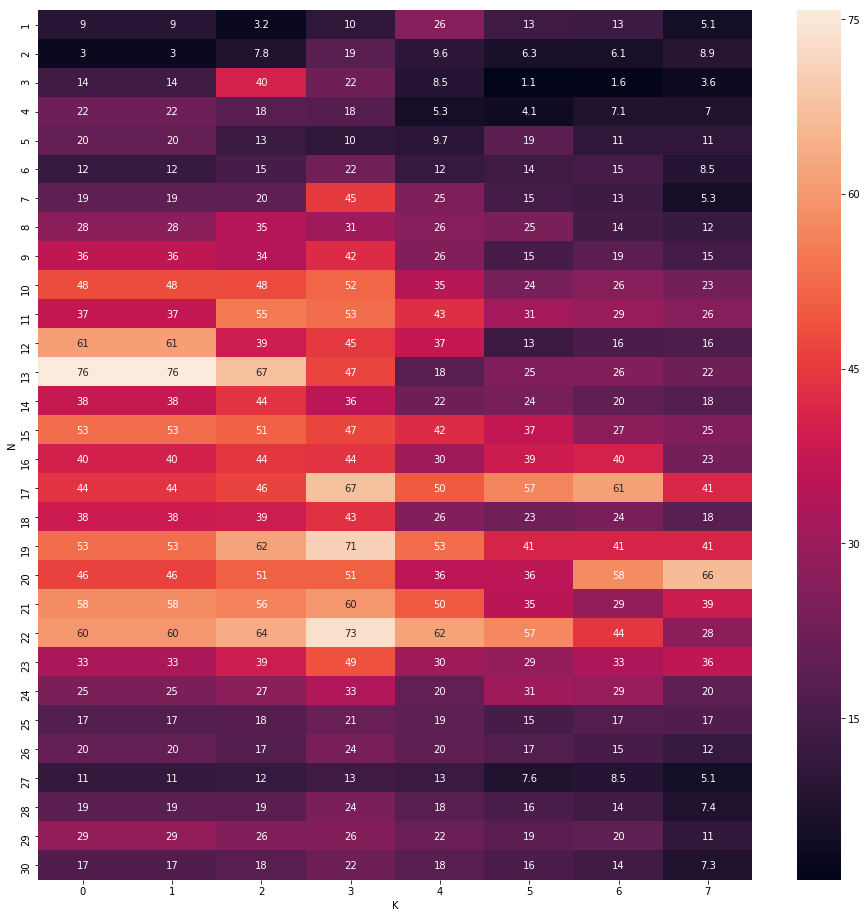

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-2005-2019-20190522.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

# RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

240

,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,0,2388,74.251269,2.931215,-0.369343,-0.723038,0.567068,0.666667,0.375151
1,1,1,2388,74.251269,2.931215,-0.369343,-0.723038,0.567068,0.666667,0.375151
2,1,3,1225,22.310506,2.931215,-0.531975,-0.723038,0.631188,0.733333,0.261322
3,1,2,1558,9.720798,2.931215,-0.533249,-0.723038,0.600780,0.533333,0.191121
4,1,4,919,15.054043,2.931215,-0.349290,-0.723038,0.618579,0.666667,0.227113


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000
mean,15.50000,3.500000,539.545833,36.048897,3.266307,-0.447452,-7.230382e-01,0.601274,0.638611,0.282506
std,8.67353,2.296076,302.407879,25.498232,0.202388,0.100864,2.599005e-15,0.019300,0.115429,0.075127
min,1.00000,0.000000,276.000000,1.166606,2.909691,-0.693769,-7.230382e-01,0.552361,0.333333,0.058694
25%,8.00000,1.750000,360.750000,14.797052,3.115400,-0.508637,-7.230382e-01,0.587975,0.533333,0.226165
50%,15.50000,3.500000,446.000000,29.152532,3.254459,-0.441484,-7.230382e-01,0.601219,0.666667,0.286380
75%,23.00000,5.250000,613.000000,53.806154,3.432926,-0.367581,-7.230382e-01,0.614561,0.733333,0.344769
max,30.00000,7.000000,2388.000000,104.466657,3.606432,-0.243741,-7.230382e-01,0.648562,0.866667,0.412514


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
80,11,0,632,89.245244,3.207436,-0.350113,-0.723038,0.591346,0.800000,0.395055
81,11,1,632,89.245244,3.207436,-0.350113,-0.723038,0.591346,0.800000,0.395055
88,12,0,622,79.278975,3.175961,-0.290993,-0.723038,0.584541,0.800000,0.383167
89,12,1,622,79.278975,3.175961,-0.290993,-0.723038,0.584541,0.800000,0.383167
96,13,0,606,100.952889,3.223192,-0.321526,-0.723038,0.596667,0.800000,0.407977
97,13,1,606,100.952889,3.223192,-0.321526,-0.723038,0.596667,0.800000,0.407977
98,13,2,534,92.966760,3.223192,-0.310682,-0.723038,0.619772,0.733333,0.399505
99,13,3,501,79.544065,3.223192,-0.319232,-0.723038,0.628283,0.733333,0.383636
112,15,0,561,78.341668,3.196922,-0.349813,-0.723038,0.583784,0.733333,0.382360
113,15,1,561,78.341668,3.196922,-0.349813,-0.723038,0.583784,0.733333,0.382360


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
114,15,2,481,90.332515,3.196922,-0.323529,-0.723038,0.630252,0.866667,0.396838
139,18,3,404,68.597469,3.339092,-0.391787,-0.723038,0.626866,0.866667,0.369394
154,20,2,409,78.646435,3.409052,-0.388865,-0.723038,0.594595,0.866667,0.383412
156,20,4,349,79.699738,3.409052,-0.294754,-0.723038,0.604585,0.866667,0.384760


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
114,15,2,481,90.332515,3.196922,-0.323529,-0.723038,0.630252,0.866667,0.396838
154,20,2,409,78.646435,3.409052,-0.388865,-0.723038,0.594595,0.866667,0.383412
156,20,4,349,79.699738,3.409052,-0.294754,-0.723038,0.604585,0.866667,0.384760


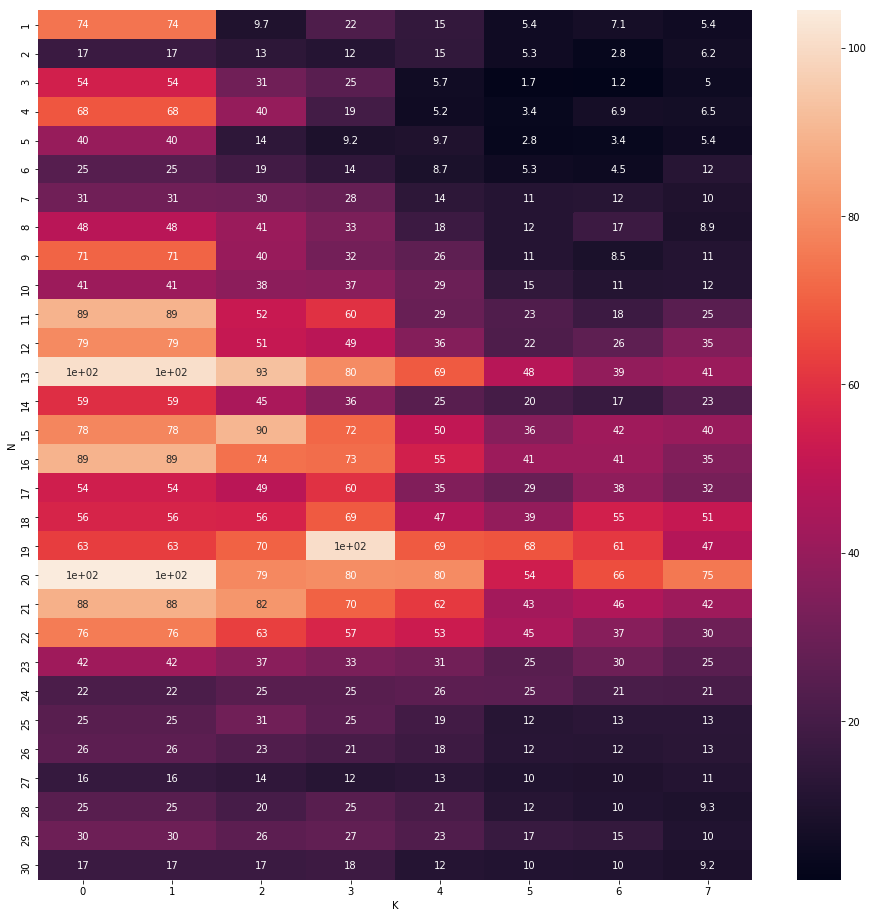

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-close-MAXN-DAYSK-2005-2019-20190524.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

240

,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,1,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411
1,1,0,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411
2,1,2,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411
3,1,3,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411
4,1,4,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000
mean,15.50000,3.500000,528.200000,25.373804,3.219344,-0.470941,-7.245794e-01,0.611721,0.630000,0.253422
std,8.67353,2.296076,315.403006,17.018297,0.204787,0.095638,4.042479e-15,0.074764,0.103621,0.069316
min,1.00000,0.000000,1.000000,1.189268,2.869227,-0.723803,-7.245794e-01,0.551008,0.400000,0.059507
25%,8.00000,1.750000,357.000000,11.673531,3.036867,-0.526007,-7.245794e-01,0.584580,0.533333,0.206436
50%,15.50000,3.500000,446.500000,20.679515,3.197939,-0.468064,-7.245794e-01,0.600485,0.666667,0.255430
75%,23.00000,5.250000,615.500000,35.505405,3.403040,-0.400692,-7.245794e-01,0.615195,0.733333,0.305502
max,30.00000,7.000000,2387.000000,74.390857,3.543274,-0.282405,-7.245794e-01,1.000000,0.866667,0.377921


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
88,12,0,632,49.404240,3.186832,-0.395397,-0.724579,0.564800,0.800000,0.336360
89,12,1,632,49.404240,3.186832,-0.395397,-0.724579,0.564800,0.800000,0.336360
123,16,3,440,49.866503,3.158969,-0.408007,-0.724579,0.615561,0.800000,0.337720
130,17,2,466,47.338264,3.292665,-0.390450,-0.724579,0.619048,0.866667,0.332792
160,21,0,453,73.176478,3.390359,-0.357878,-0.724579,0.602222,0.800000,0.376263
161,21,1,453,73.176478,3.390359,-0.357878,-0.724579,0.602222,0.800000,0.376263
162,21,2,402,74.390857,3.390359,-0.357143,-0.724579,0.602500,0.800000,0.377921
166,21,6,315,61.668091,3.390359,-0.282405,-0.724579,0.608280,0.800000,0.359162
167,21,7,299,66.136813,3.390359,-0.320050,-0.724579,0.617450,0.800000,0.366123
170,22,2,392,72.949745,3.452261,-0.290190,-0.724579,0.618557,0.800000,0.376079


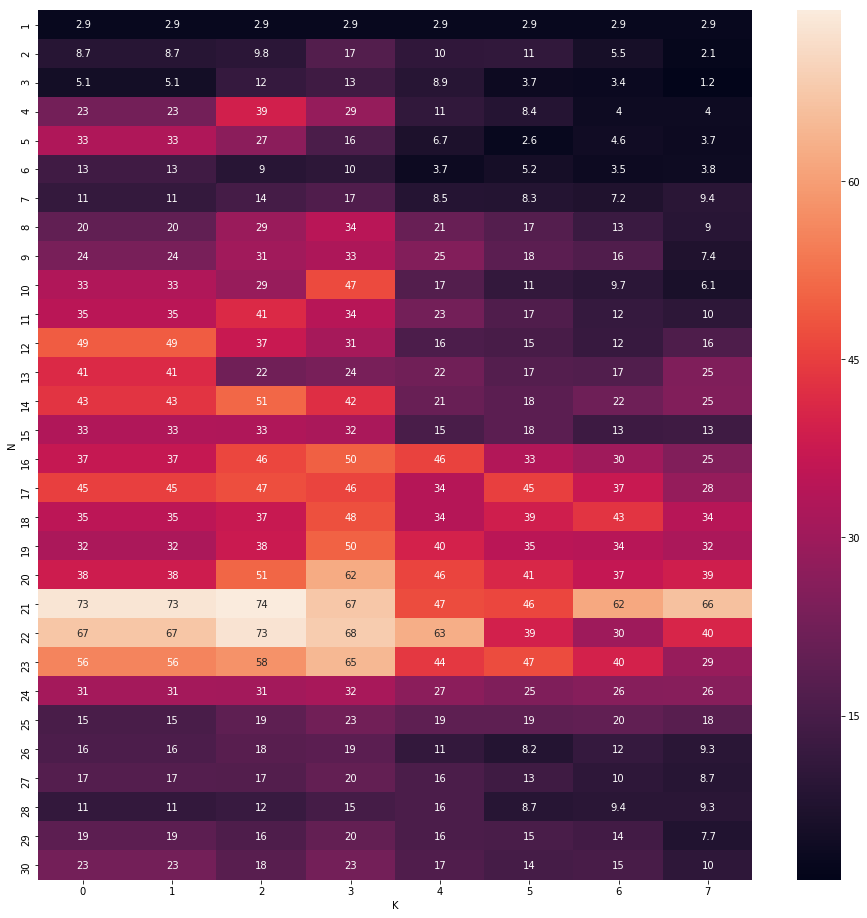

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-YESTERDAYclose-TODAYopen-MAXN-DAYSK-20190525.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-TT-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

FileNotFoundError: File b'../database/2005-2019-399300-TT-PARAMTEST-20190305.csv' does not exist

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-MA-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-TT-PARAMTEST-20190306.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-MA-PARAMTEST-20190307.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

# md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN'] > md]
df[df['RETURN'] > df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)